## Curso de Big Data

## Trabajo Práctico 3 - Parte 2

### Grupo:  Armas Braithwaite, Fernández, Menta, Vargas Ochuza

In [1]:
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

## Ejercicio 1

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos de cáncer de mama
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [4]:
def evalua_metodo(modelo, X_train, y_train, X_test, y_test):
    '''
    Evalua un modelo de clasificación proporcionando métricas clave y visualizando la curva ROC.
    
    Input:
    - modelo: modelo de clasificación ya instanciado (debe tener los métodos `fit`, `predict` y `predict_proba`).
    - X_train, y_train: datos de entrenamiento.
    - X_test, y_test: datos de prueba.
    
    Output:
    - Diccionario con las siguientes métricas:
        * matriz_confusion: Matriz de confusión del modelo.
        * valor_auc: Área bajo la curva ROC.
        * accuracy: Precisión del modelo.
    - Gráfico de la curva ROC.
    '''
    # Entrenando el modelo
    modelo.fit(X_train, y_train)
    
    # Predicciones
    y_pred = modelo.predict(X_test)
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]
    
    # Calculando métricas
    matriz_confusion = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    valor_auc = auc(fpr, tpr)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Dibujando la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (área = %0.2f)' % valor_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()
    
    # Retornando métricas
    return {
        'matriz_confusion': matriz_confusion,
        'valor_auc': valor_auc,
        'accuracy': accuracy
    }


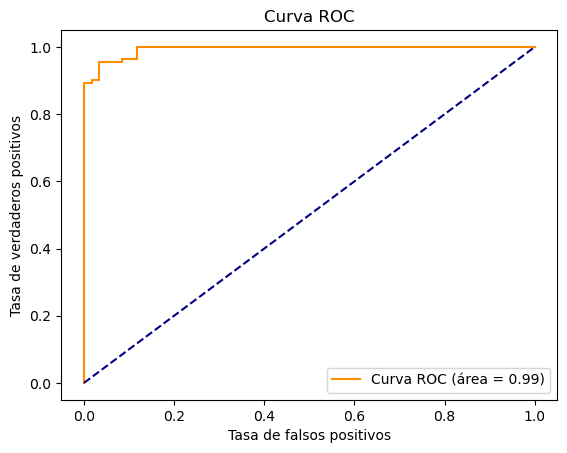

{'matriz_confusion': array([[ 57,   2],
       [  6, 106]], dtype=int64), 'valor_auc': 0.9930387409200968, 'accuracy': 0.9532163742690059}


In [11]:
# Definir el modelo
modelo = LogisticRegression(max_iter=10000)

# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
print(resultados)

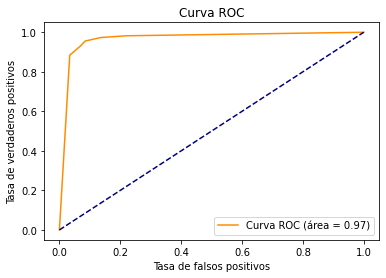

{'matriz_confusion': array([[ 54,   5],
       [  5, 107]], dtype=int64), 'valor_auc': 0.9662530266343827, 'accuracy': 0.9415204678362573}


In [5]:
# Definir el modelo
knn = KNeighborsClassifier(n_neighbors=5)
modelo2=knn.fit(X_train, y_train)
#Usar la función evalua_metodo
resultados = evalua_metodo(modelo2, X_train, y_train, X_test, y_test)
print(resultados)

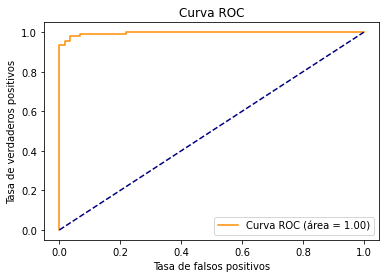

{'matriz_confusion': array([[ 53,   6],
       [  1, 111]], dtype=int64), 'valor_auc': 0.9962167070217918, 'accuracy': 0.9590643274853801}


In [7]:
# Definir el modelo
modelo3= LinearDiscriminantAnalysis(n_components=1)
#Usar la función evalua_metodo
resultados = evalua_metodo(modelo3, X_train, y_train, X_test, y_test)
print(resultados)

## Ejercicio 2

In [12]:
def cross_validation(modelo, k, X, y):
    """
    Realiza validación cruzada k-fold y evalúa un modelo de clasificación en cada partición.
    
    Parámetros:
    - modelo: modelo de clasificación ya instanciado.
    - k: número de particiones para la validación cruzada.
    - X: variables independientes del conjunto de datos.
    - y: variable dependiente (target) del conjunto de datos.
    
    Devoluciones:
    - Un DataFrame con el grado (si es aplicable), partición y el error cuadrático medio (ECM) 
      para cada iteración de la validación cruzada.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=100)
    resultados = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):   
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        metrics = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
            
        resultados.append({
            "particion": i,
            "matriz_confusion": metrics["matriz_confusion"],
            "valor_auc": metrics["valor_auc"],
            "accuracy": metrics["accuracy"]
        })
    
    return pd.DataFrame(resultados)

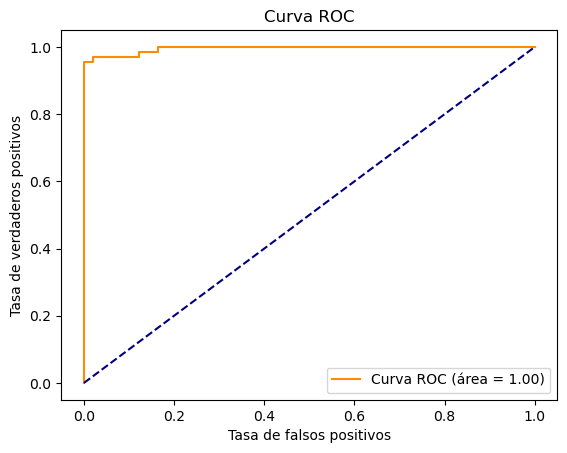

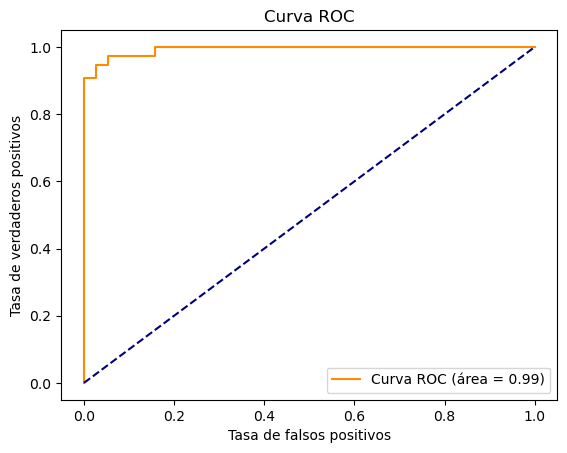

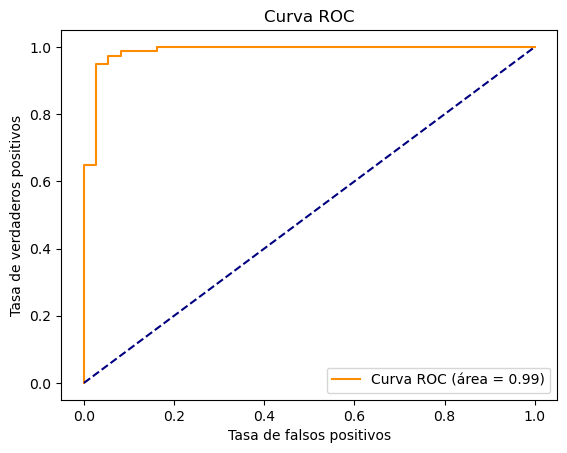

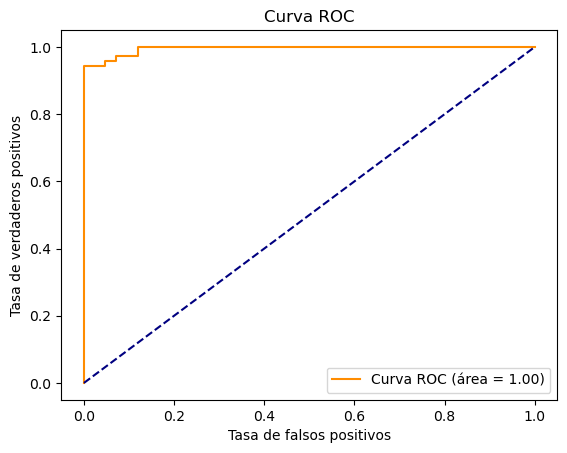

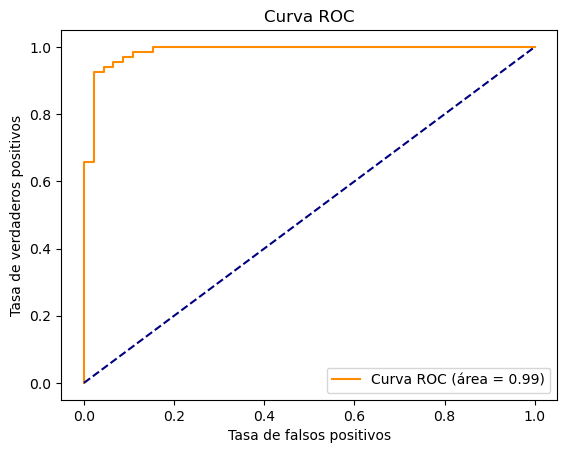

   particion    matriz_confusion  valor_auc  accuracy
0          0  [[46, 3], [2, 63]]   0.995290  0.956140
1          1  [[35, 3], [2, 74]]   0.993421  0.956140
2          2  [[35, 2], [3, 74]]   0.987364  0.956140
3          3  [[38, 4], [2, 70]]   0.995040  0.947368
4          4  [[41, 5], [1, 66]]   0.987346  0.946903


In [13]:
K = 5
resultados_cv = cross_validation(modelo, K, X, y)
print(resultados_cv)

## Ejercicio 3

In [16]:
def evalua_config(configuraciones, X, y):
    """
    Evalúa diferentes configuraciones de hiperparámetros para un modelo y devuelve la mejor configuración.
    
    Parámetros:
    - configuraciones (list): Lista de diccionarios con las diferentes configuraciones de hiperparámetros.
    - X: variables independientes del conjunto de datos.
    - y: variable dependiente (target) del conjunto de datos.
    
    Devoluciones:
    - Diccionario con la mejor configuración y su correspondiente precisión promedio.
    """
    
    mejor_configuracion = None
    mejor_accuracy = 0
    
    for config in configuraciones:
        modelo = LogisticRegression(max_iter=10000, **config)
        resultados = cross_validation(modelo, 5, X, y)
        accuracy_promedio = resultados['accuracy'].mean()
        
        if accuracy_promedio > mejor_accuracy:
            mejor_accuracy = accuracy_promedio
            mejor_configuracion = config
    
    return {
        'mejor_configuracion': mejor_configuracion,
        'mejor_accuracy': mejor_accuracy
    }





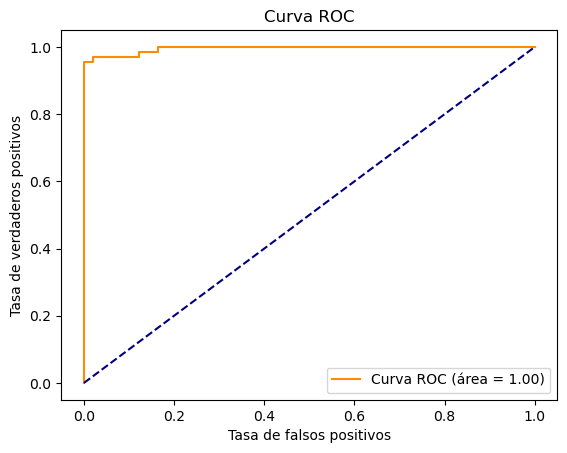

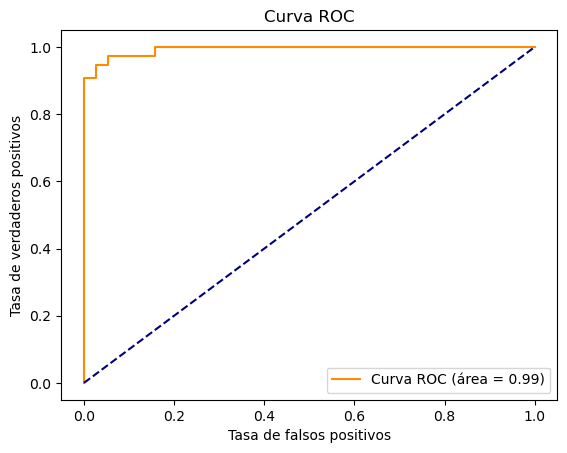

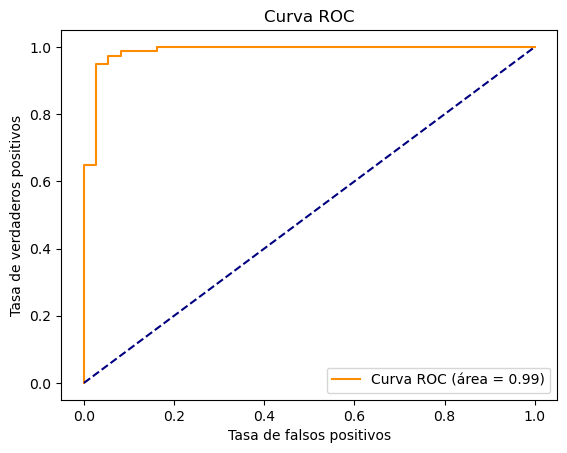

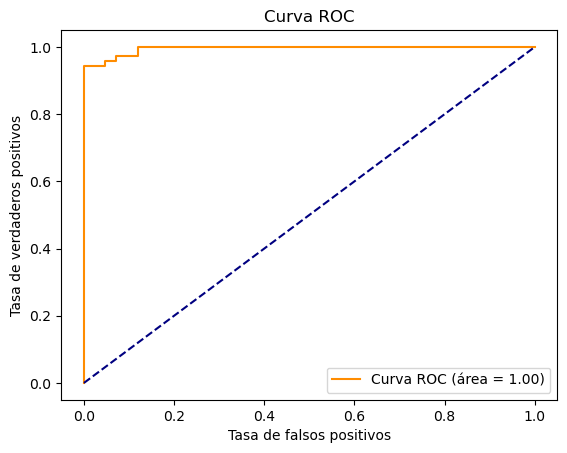

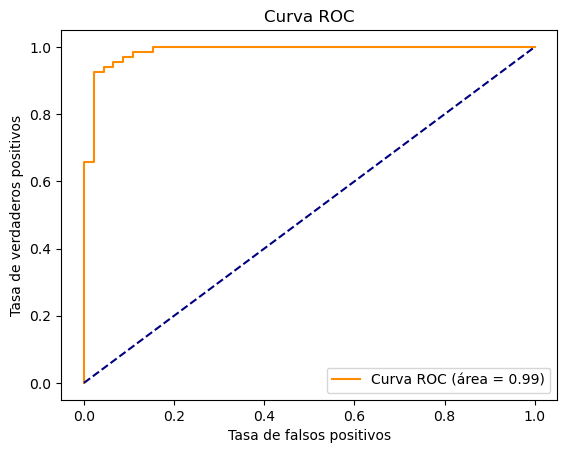

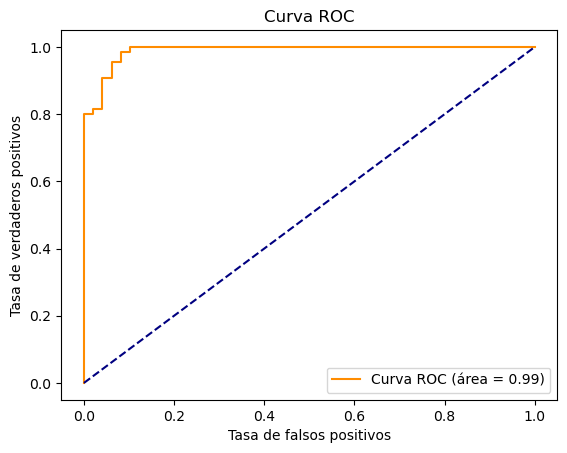

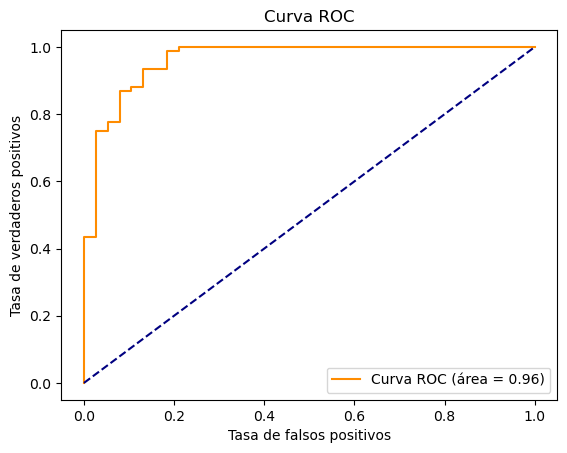

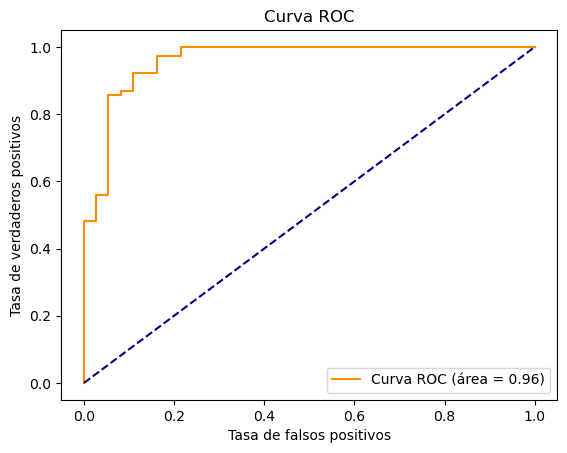

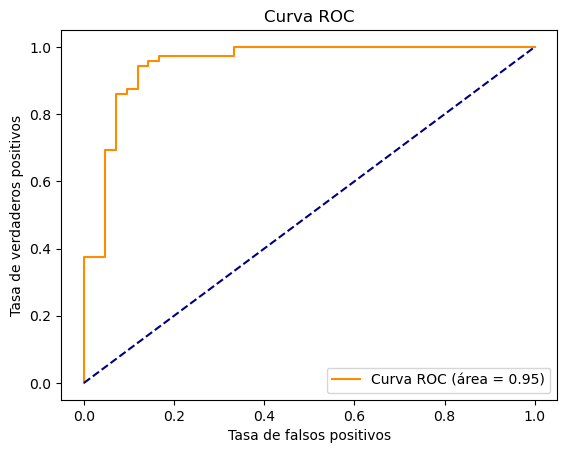

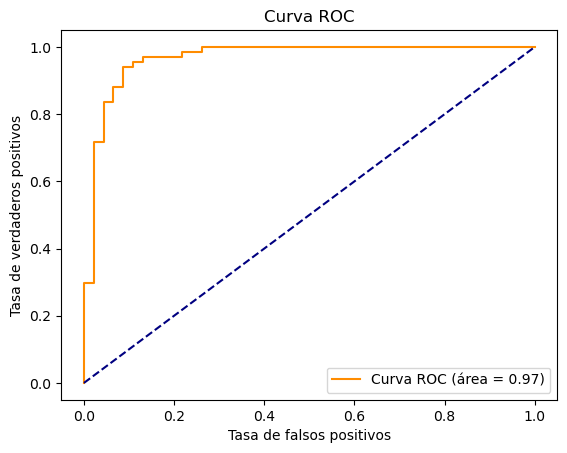

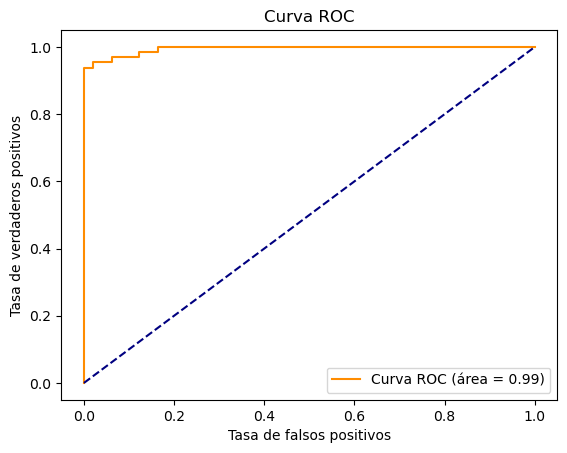

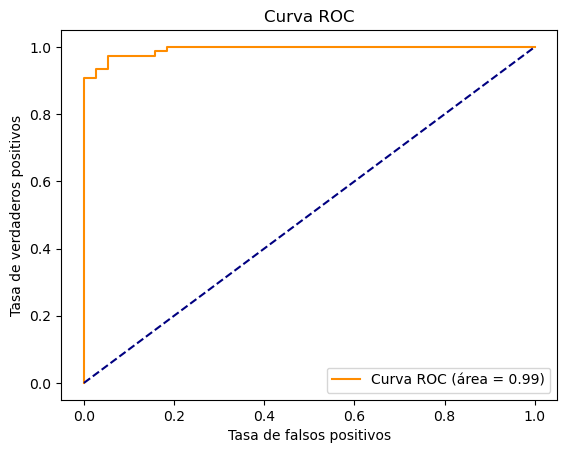

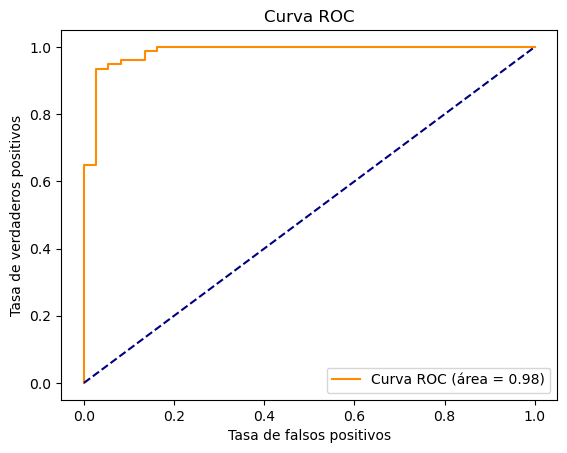

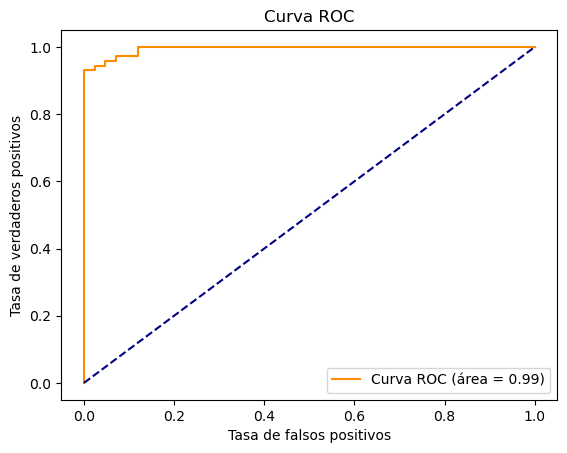

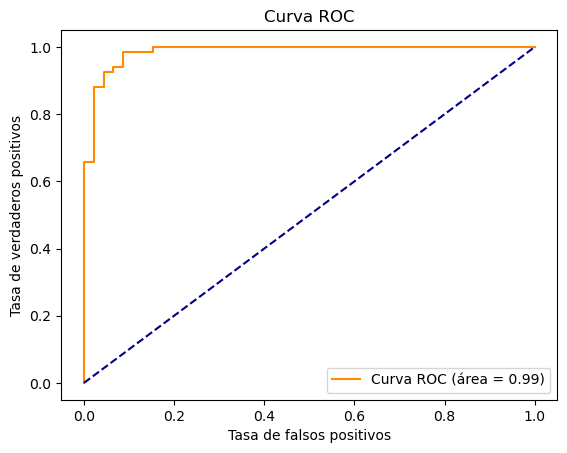

{'mejor_configuracion': {'penalty': 'l2', 'C': 0.5}, 'mejor_accuracy': 0.9525539512498058}


In [17]:
configuraciones = [
    {'penalty': 'l2', 'C': 1.0},
    {'penalty': 'l1', 'C': 1.0, 'solver': 'saga'},
    {'penalty': 'l2', 'C': 0.5},
    ]

resultado = evalua_config(configuraciones, X, y)
print(resultado)


## Ejercicio 4

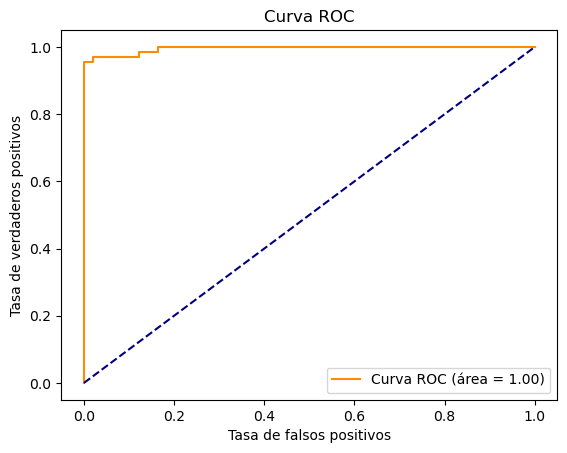

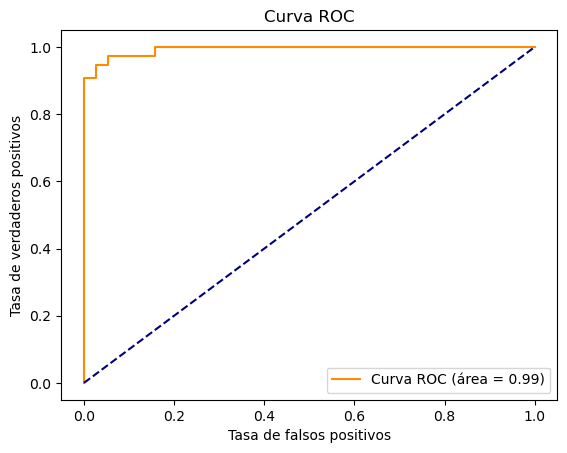

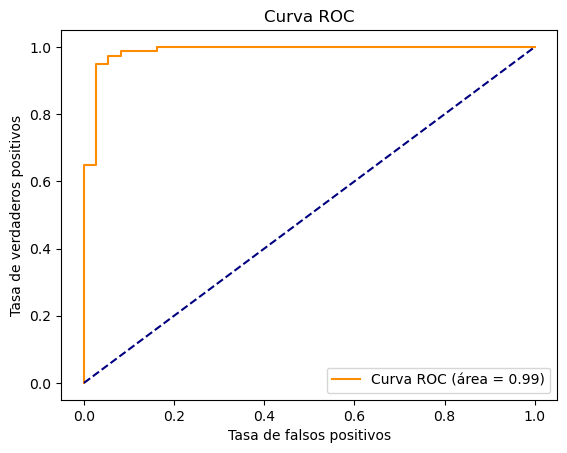

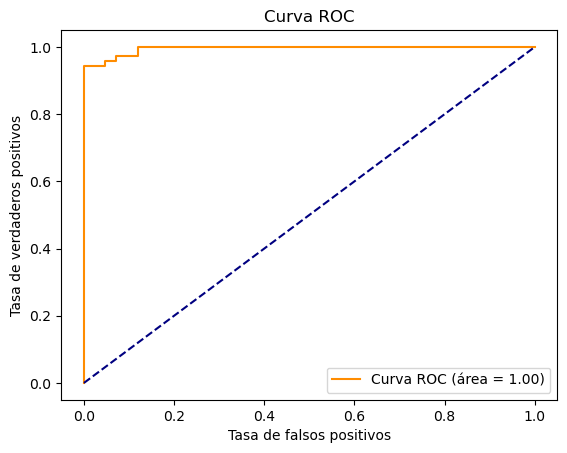

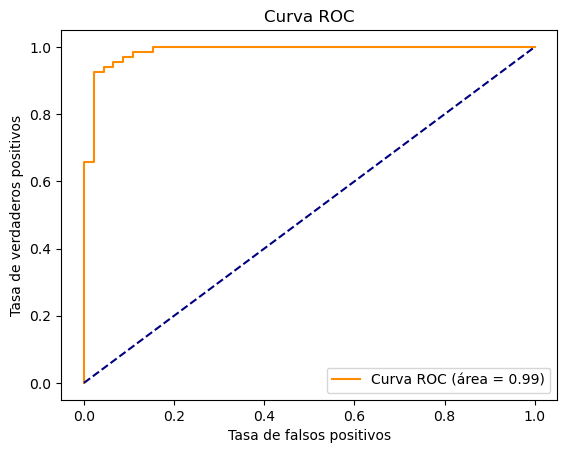

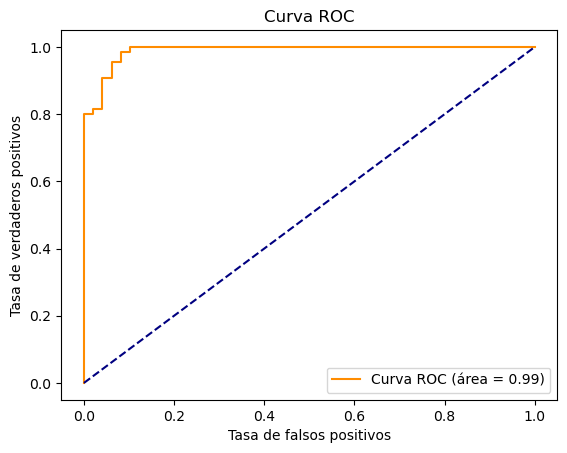

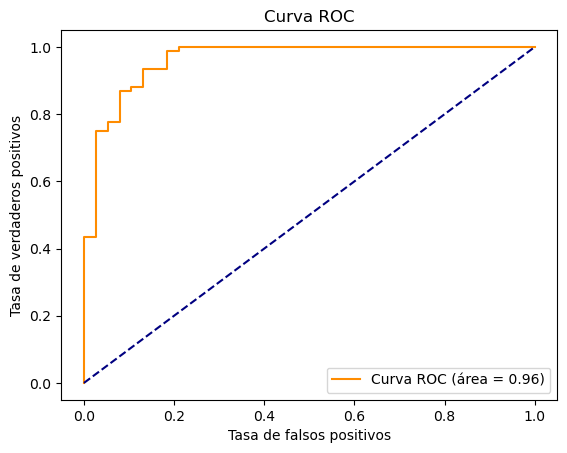

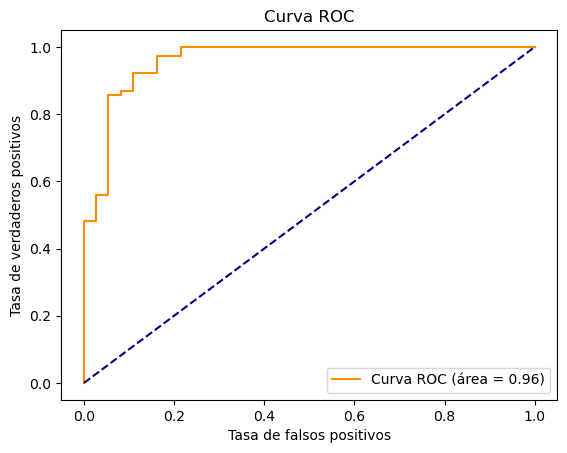

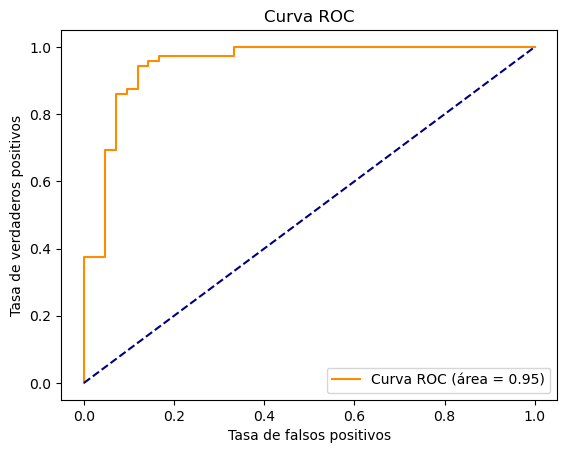

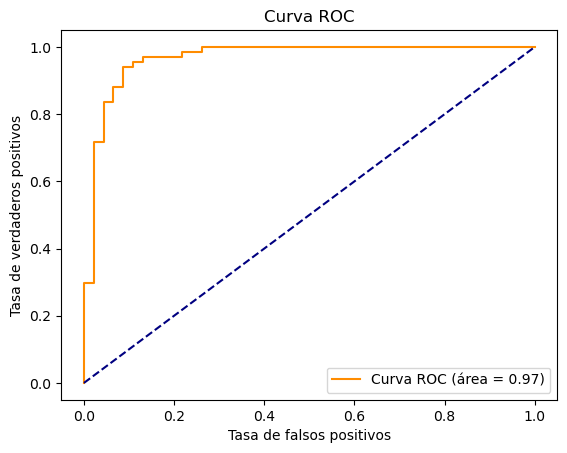

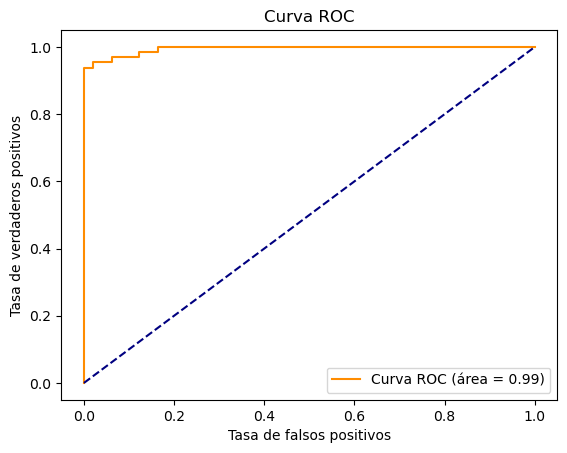

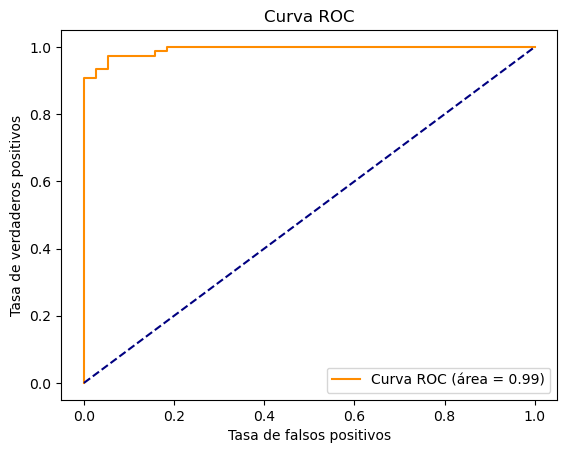

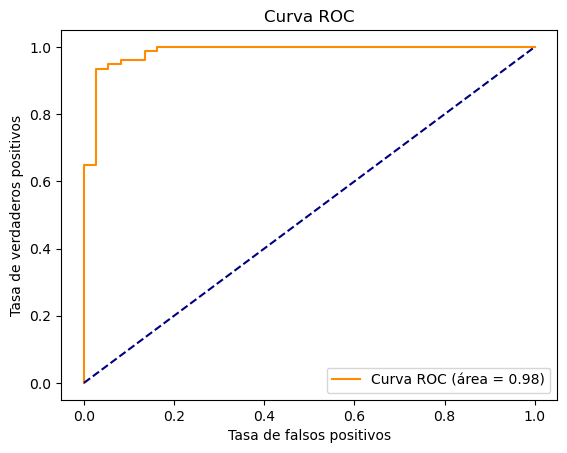

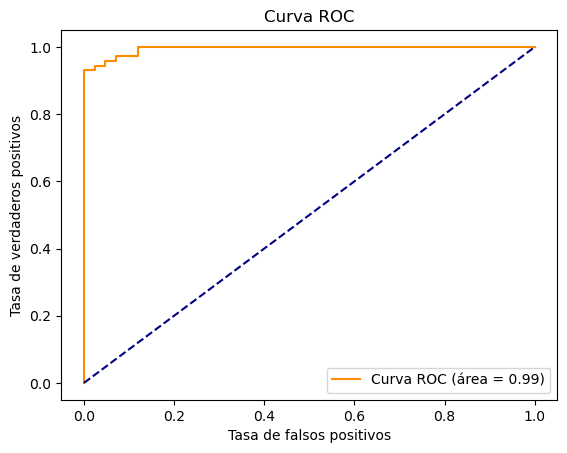

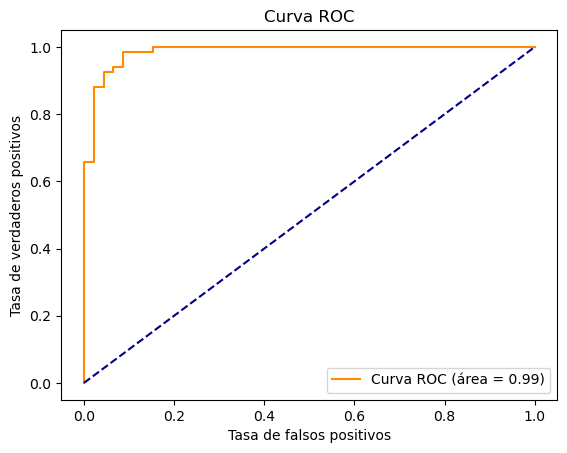

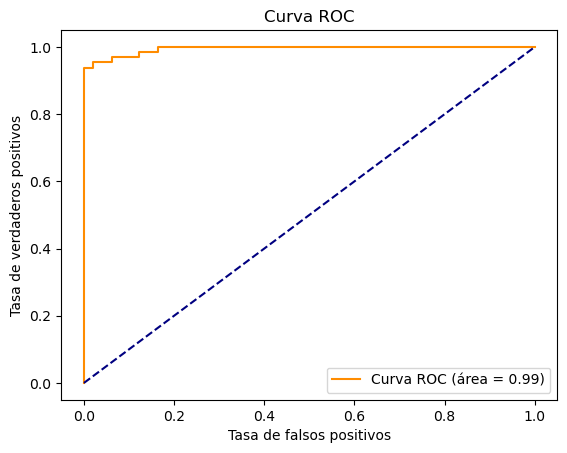

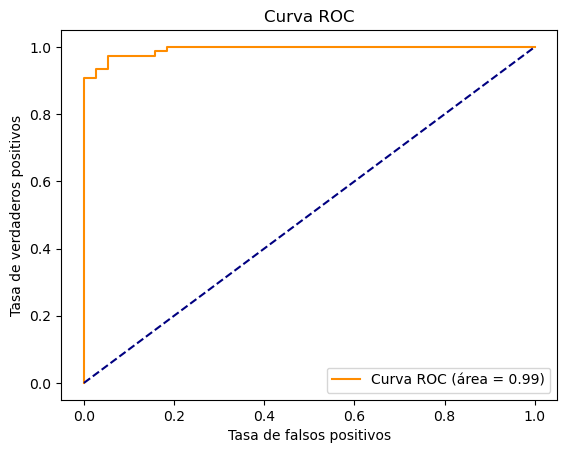

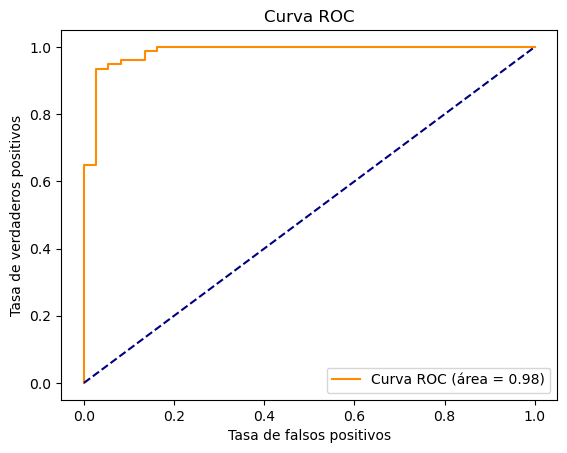

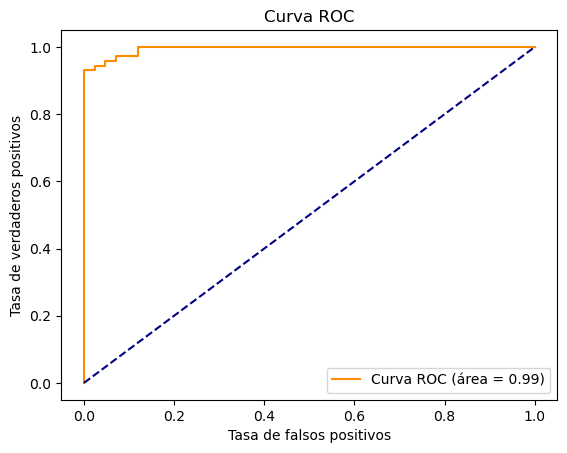

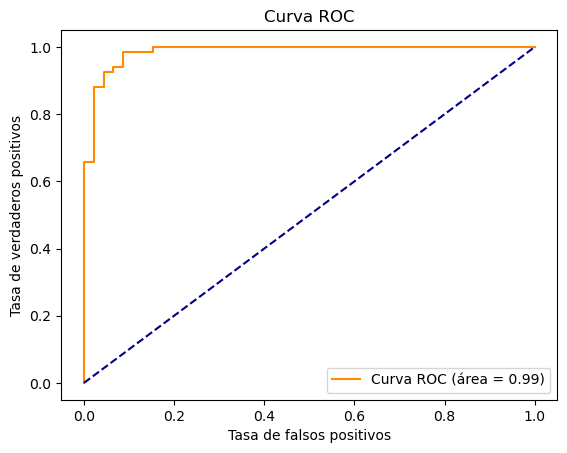

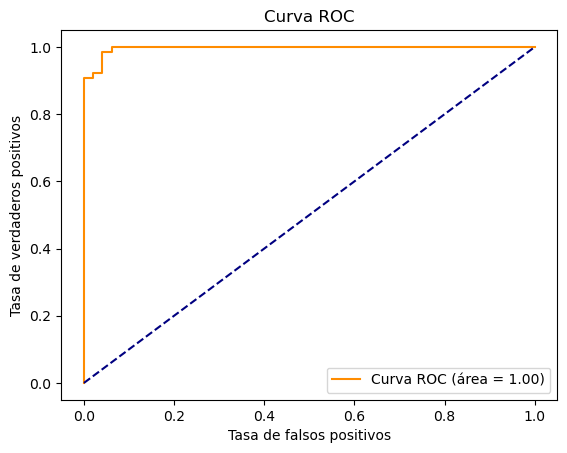

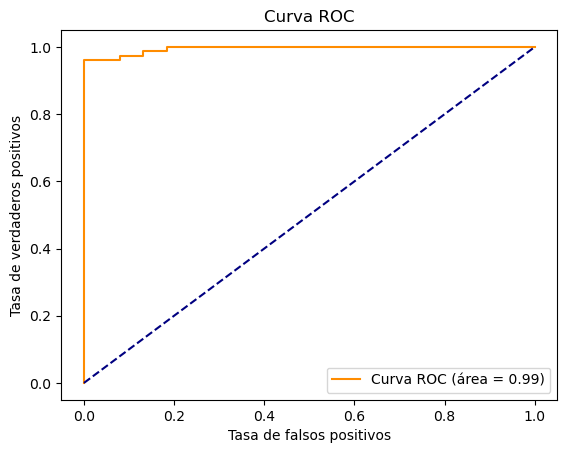

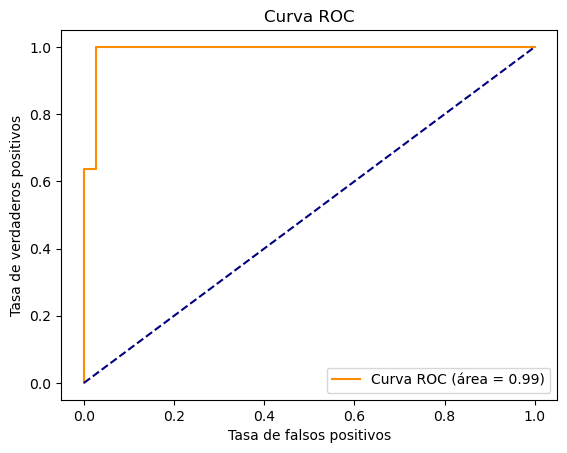

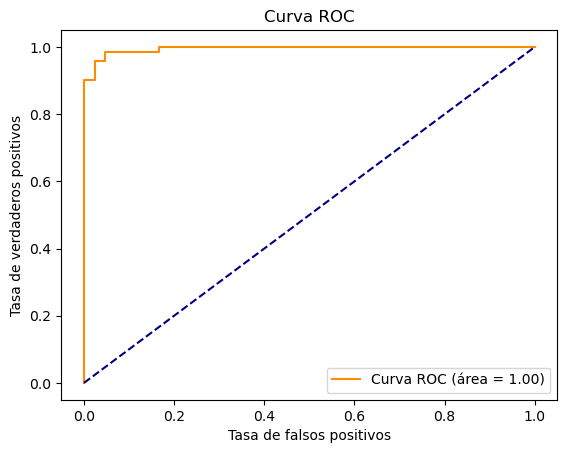

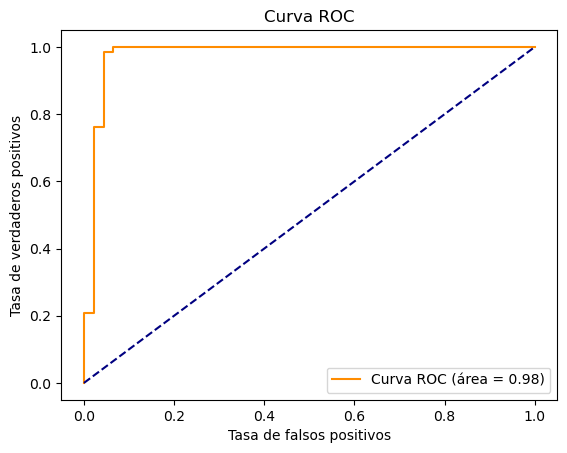

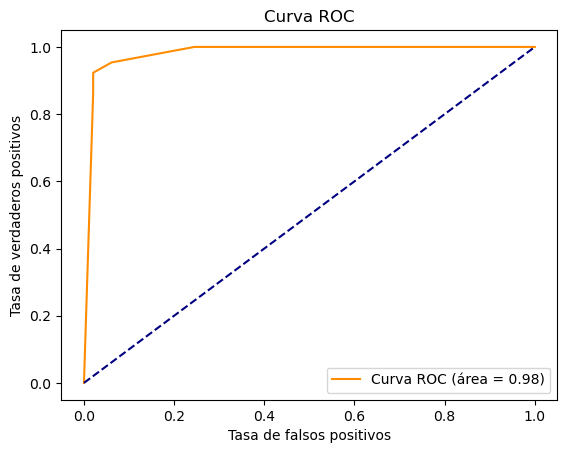

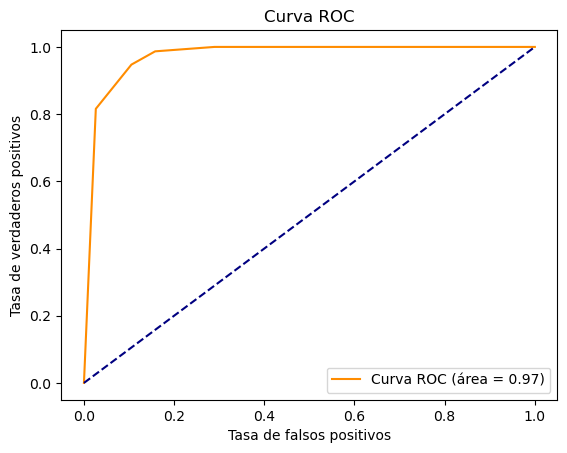

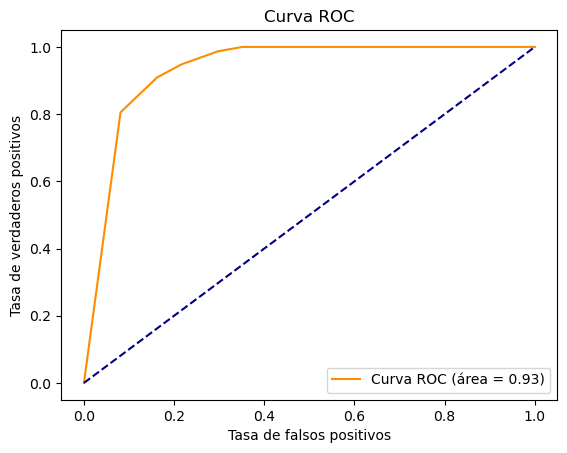

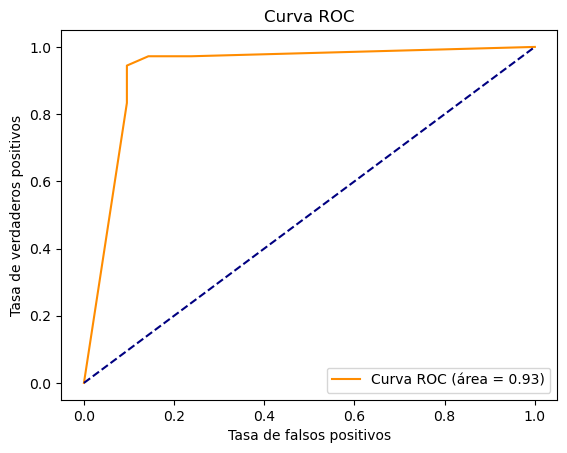

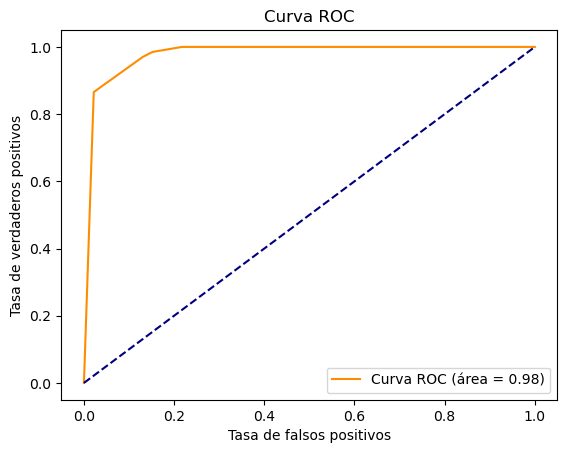

                                              Modelo  accuracy_promedio  \
0  Regresion Logistica {'C': 0.5, 'class_weight':...           0.952554   
1  LDA {'covariance_estimator': None, 'n_componen...           0.957802   
2  KNN {'algorithm': 'auto', 'leaf_size': 30, 'me...           0.927946   

   valor_auc_promedio  
0            0.990548  
1            0.990708  
2            0.958849  


In [20]:
def evalua_multiples_metodos(X, y):
    modelos = {
        "Regresion Logistica": LogisticRegression(max_iter=10000),
        "LDA": LinearDiscriminantAnalysis(),
        "KNN": KNeighborsClassifier(n_neighbors=5) # Puedes ajustar n_neighbors
    }

    # Optimización de hiperparámetros para Regresión Logística
    configuraciones_rl = [
        {'penalty': 'l2', 'C': 1.0},
        {'penalty': 'l1', 'C': 1.0, 'solver': 'saga'},
        {'penalty': 'l2', 'C': 0.5},
        ]
    mejor_config = evalua_config(configuraciones_rl, X, y)['mejor_configuracion']
    modelos["Regresion Logistica"].set_params(**mejor_config)

    # Almacenar resultados
    resultados = []

    for nombre, modelo in modelos.items():
        metricas = cross_validation(modelo, 5, X, y)
        accuracy_promedio = metricas['accuracy'].mean()
        valor_auc_promedio = metricas['valor_auc'].mean()

        resultados.append({
            "Modelo": nombre + " " + str(modelo.get_params()),
            "accuracy_promedio": accuracy_promedio,
            "valor_auc_promedio": valor_auc_promedio
        })

    return pd.DataFrame(resultados)

# Ejemplo de uso:
resultados_modelos = evalua_multiples_metodos(X, y)
print(resultados_modelos)
